<a href="https://colab.research.google.com/github/SVaishnaviVasa/Predicting-next-word--DL-project/blob/main/Predict_Next_Word_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IMPORT LIBRARIES**

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


# **2. LOAD YOUR FILE**

In [8]:
from google.colab import files
uploaded = files.upload()

Saving dataset.txt to dataset.txt


# **3. OPEN AND PRE-PROCESS THE DATA**

In [8]:
file = open("dataset.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:]

'The Project Gutenberg EBook of Metamorphosis, by Franz Kafka Translated by David Wyllie. This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org ** This is a COPYRIGHTED Project Gutenberg eBook, Details Below ** ** Please follow the copyright guidelines in this file. ** Title: Metamorphosis Author: Franz Kafka Translator: David Wyllie Release Date: August 16, 2005 [EBook #5200] First posted: May 13, 2002 Last updated: May 20, 2012 Language: English *** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS *** Copyright (C) 2002 David Wyllie. Metamorphosis Franz Kafka Translated by David Wyllie I One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his 

In [9]:
len(data)

138048

## **4. APPLY TOKENIZATION AND SOME OTHER CHANGES**

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:]

[1,
 45,
 43,
 283,
 5,
 511,
 55,
 687,
 688,
 847,
 55,
 593,
 594,
 27,
 283,
 75,
 18,
 1,
 148,
 5,
 270,
 689,
 22,
 48,
 848,
 3,
 14,
 169,
 48,
 1110,
 849,
 32,
 214,
 271,
 9,
 239,
 9,
 99,
 33,
 850,
 148,
 9,
 137,
 1,
 156,
 5,
 1,
 45,
 43,
 225,
 690,
 14,
 27,
 283,
 33,
 691,
 22,
 512,
 43,
 272,
 27,
 75,
 12,
 1111,
 45,
 43,
 283,
 1569,
 513,
 284,
 1112,
 1,
 179,
 1570,
 8,
 27,
 851,
 1571,
 511,
 1572,
 687,
 688,
 1573,
 593,
 594,
 1574,
 852,
 1575,
 1576,
 1577,
 283,
 692,
 80,
 514,
 214,
 1578,
 1113,
 285,
 1114,
 214,
 1115,
 1579,
 1580,
 1581,
 398,
 5,
 27,
 45,
 43,
 283,
 511,
 179,
 515,
 1113,
 593,
 594,
 511,
 687,
 688,
 847,
 55,
 593,
 594,
 71,
 57,
 157,
 63,
 15,
 105,
 1116,
 29,
 1582,
 1117,
 4,
 226,
 46,
 1583,
 8,
 6,
 121,
 56,
 12,
 853,
 1584,
 4,
 180,
 24,
 6,
 1585,
 94,
 52,
 3,
 31,
 4,
 516,
 6,
 95,
 12,
 78,
 4,
 34,
 84,
 6,
 693,
 854,
 399,
 1586,
 3,
 1587,
 55,
 1588,
 56,
 855,
 1118,
 1,
 1589,
 7,
 227,
 149,


In [11]:
len(sequence_data)

25309

In [12]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3068


In [13]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:]

The Length of sequences are:  25306


array([[   1,   45,   43,  283],
       [  45,   43,  283,    5],
       [  43,  283,    5,  511],
       ...,
       [3067,    2,  262,   59],
       [   2,  262,   59,  248],
       [ 262,   59,  248,  508]])

# **5. CREATING THE MODEL**

In [14]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)


In [15]:
print("Data: ", X[:])
print("Response: ", y[:])

Data:  [[   1   45   43]
 [  45   43  283]
 [  43  283    5]
 ...
 [3067    2  262]
 [   2  262   59]
 [ 262   59  248]]
Response:  [283   5 511 ...  59 248 508]


In [16]:
y = to_categorical(y, num_classes=vocab_size)
y[:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             30680     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 3068)              3071068   
                                                                 
Total params: 16,150,748
Trainable params: 16,150,748
Non-trainable params: 0
_________________________________________________________________


# **6. PLOT THE MODEL**

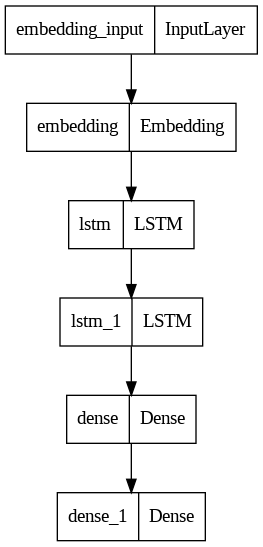

In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

# **7. TRAIN THE MODEL**

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
396/396 [==============================] - ETA: 0s - loss: 6.4465
Epoch 1: loss improved from inf to 6.44650, saving model to next_words.h5
396/396 [==============================] - 22s 30ms/step - loss: 6.4465
Epoch 2/70
394/396 [============================>.] - ETA: 0s - loss: 6.0187
Epoch 2: loss improved from 6.44650 to 6.01795, saving model to next_words.h5
396/396 [==============================] - 6s 16ms/step - loss: 6.0179
Epoch 3/70
396/396 [==============================] - ETA: 0s - loss: 5.7101
Epoch 3: loss improved from 6.01795 to 5.71009, saving model to next_words.h5
396/396 [==============================] - 6s 16ms/step - loss: 5.7101
Epoch 4/70
395/396 [============================>.] - ETA: 0s - loss: 5.3919
Epoch 4: loss improved from 5.71009 to 5.39093, saving model to next_words.h5
396/396 [==============================] - 6s 14ms/step - loss: 5.3909
Epoch 5/70
394/396 [============================>.] - ETA: 0s - loss: 5.1000
Epoch 5: loss improved

# **8. START PREDICTION**

In [21]:
 from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [23]:
print("PRESS 0 TO STOP ENTERING")
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

PRESS 0 TO STOP ENTERING
Enter your line: One morning, when Gregor Samsa
['when', 'Gregor', 'Samsa']
1/1 [==============================] - 0s 30ms/step
woke
Enter your line: The Project
['The', 'Project']
1/1 [==============================] - 0s 18ms/step
gutenberg
Enter your line: 0
Execution completed.....
